[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.1%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%EC%A3%BC%20%EC%88%98%EC%A7%91-input.ipynb)

## 업종/테마 미션

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?


## 업종/테마주 수집

전체 실습을 하고 아래의 URL로 URL만 변경하게 되면 원하는 업종과 테마를 수집할 수 있습니다.

* 2차 전지 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
* 제약 업종 : https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261
* 코로나19(덱사메타손) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=442
* 제약업체 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=172
* 바이오시밀러(복제 바이오의약품) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=241

In [1]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
font_family = get_font_family()

In [4]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [5]:
# 그래프 스타일 설정
plt.style.use("seaborn")

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\petpulslab\AppData\Local\Temp\ipykernel_39684\2960125416.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\petpulslab\AppData\Local\Temp\ipykernel_39684\2960125416.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<Axes: title={'center': '한글'}>

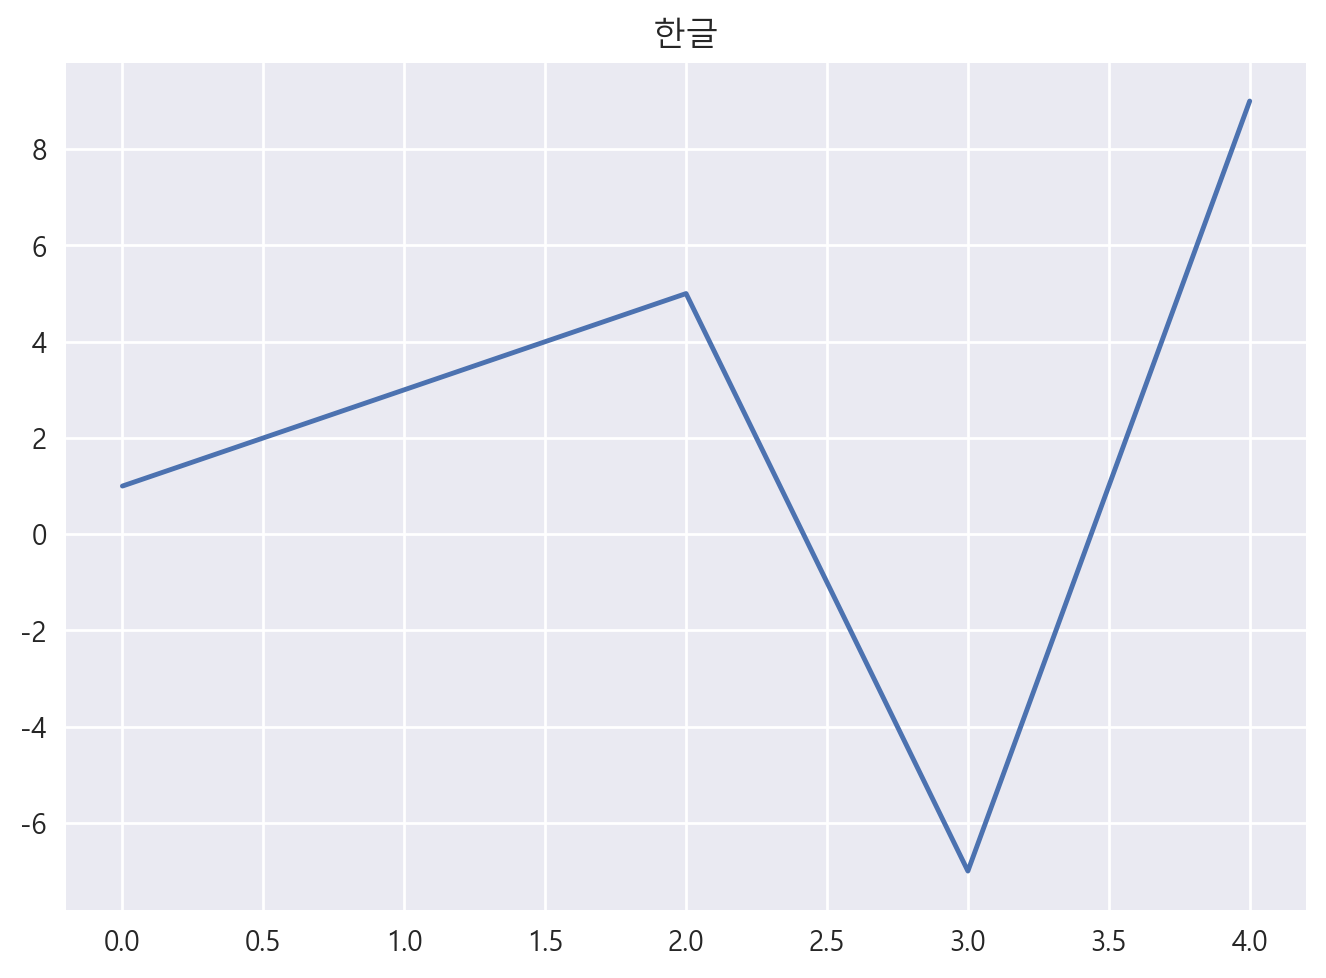

In [6]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1,3,5,-7,9]).plot(title = '한글')

### 제약업종 수집하기
* https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261

In [7]:
# 수집할 업종/테마주소
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35"
# 2차전지
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64"
# 디스플레이장비및부품
url = "https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=269"

In [8]:
# read_html을 통해 해당 업종/테마를 수집합니다.
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [9]:
# 데이터들은 table[2]에 전부 있고
# dropna를 통해 결측치를 제거합니다.
# how='all' 이면 전부 결측치일시 row나 column을 제거합니다.
raw = table[2]
print(raw.shape)
# 3개의 row, 3개의 column이 제거되었습니다.
raw = raw.dropna(how="all").dropna(axis=1, how="all")
print(raw.shape)

(93, 12)
(90, 9)


## 파생변수 만들기

In [10]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime
today = datetime.datetime.today()
today = today.strftime("%y-%m-%d")
today

'23-08-17'

In [11]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
raw["조회일자"] = today

In [12]:
# 조회일자가 추가되었는지 확인해 봅니다.
raw

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,엘에이티,7600.0,960.0,+14.46%,5680.0,7550.0,2.0,15.0,1.0,23-08-17
2,엘리비젼,648.0,52.0,+8.72%,0.0,507.0,1.0,0.0,825.0,23-08-17
3,핌스 *,17790.0,1170.0,+7.04%,17770.0,17790.0,165363.0,2887.0,110571.0,23-08-17
4,HB솔루션 *,5270.0,330.0,+6.68%,5260.0,5270.0,6035649.0,31561.0,1997909.0,23-08-17
5,토비스 *,16920.0,1030.0,+6.48%,16920.0,16930.0,406818.0,6679.0,255516.0,23-08-17
...,...,...,...,...,...,...,...,...,...,...
86,인베니아 *,1335.0,55.0,-3.96%,1335.0,1338.0,94304.0,126.0,67758.0,23-08-17
87,소룩스 *,19050.0,1200.0,-5.93%,19050.0,19090.0,223314.0,4384.0,232842.0,23-08-17
88,테크엔,202.0,30.0,-12.93%,202.0,0.0,216.0,50.0,296.0,23-08-17
89,럭스피아,1276.0,225.0,-14.99%,0.0,1276.0,11.0,14.0,1.0,23-08-17


## 거래량과 거래대금 시각화

<Axes: ylabel='종목명'>

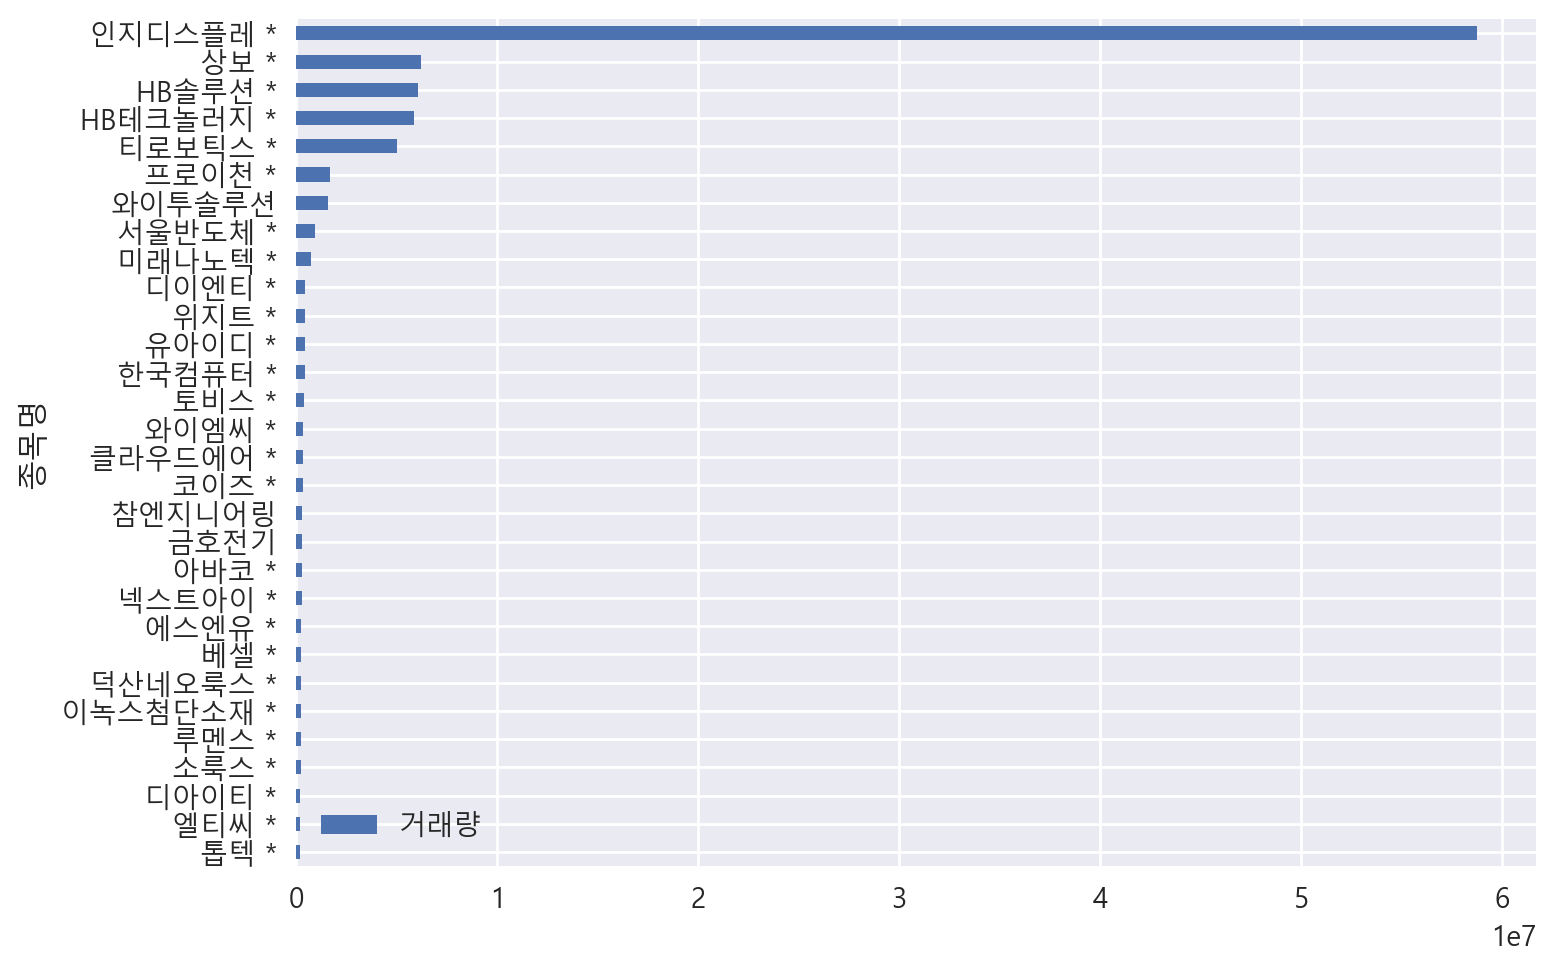

In [13]:
# 종목명 대비 거래량을 bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# sort_values시의 기본값이 오름차순이기 때문에 
# DataFrame의 하위 30개를 가져와야 거래량 상위 30개의 종목을 시각화 합니다.
temp = raw[['종목명','거래량']].sort_values("거래량")
temp.set_index('종목명').tail(30).plot.barh()

<Axes: ylabel='종목명'>

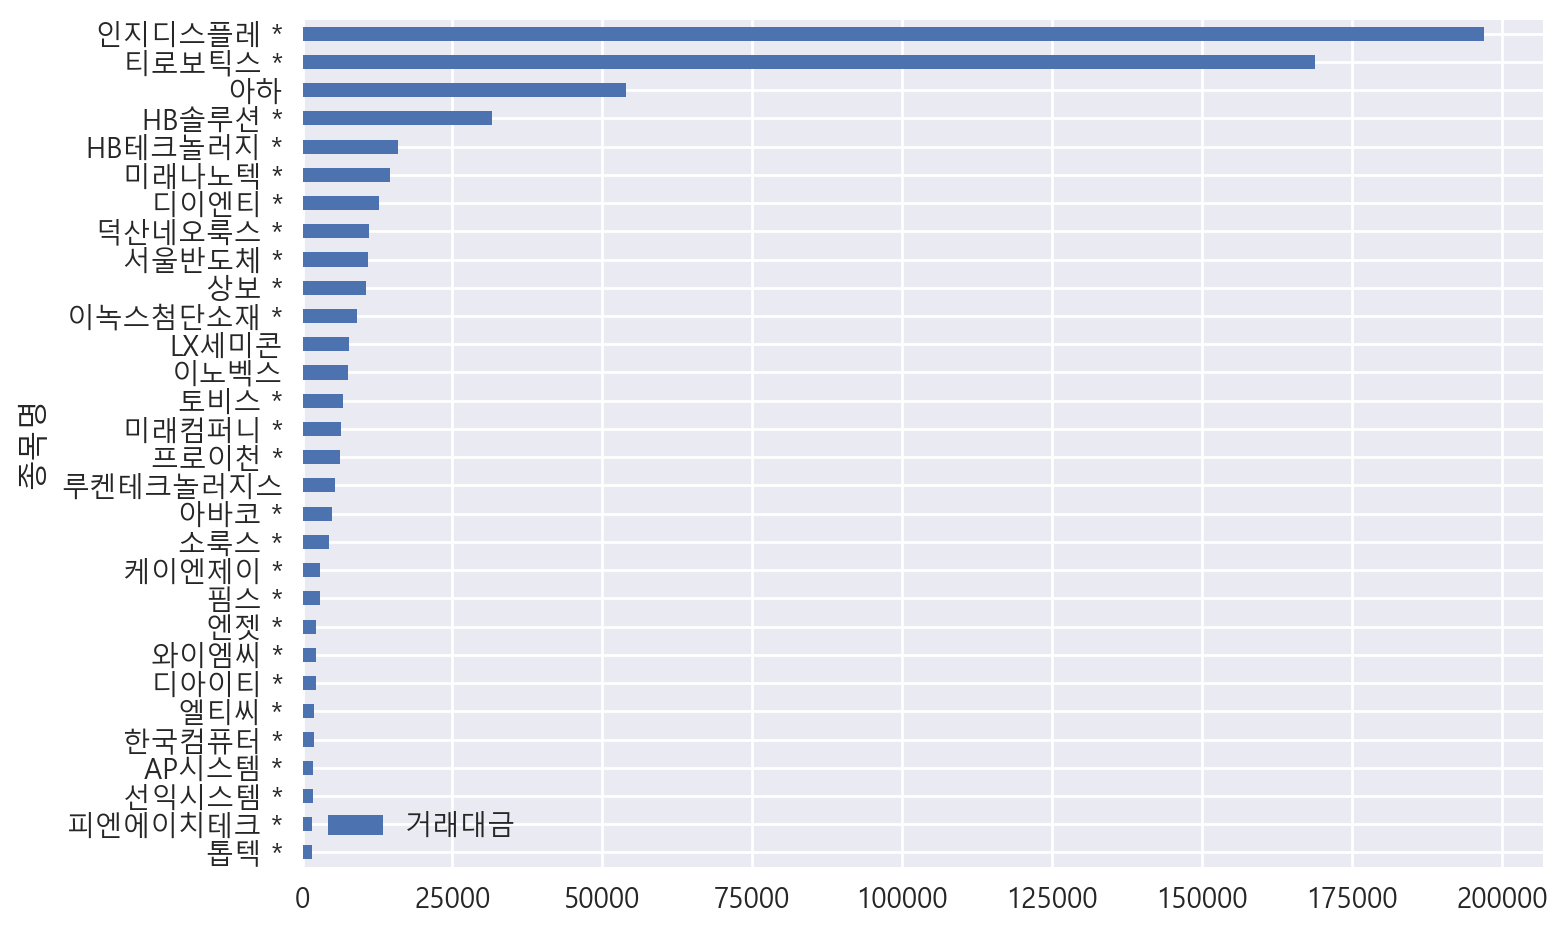

In [14]:
# 위와 동일한 방법으로 종목명 대비 거래대금의 bar chart를 시각화 합니다.
temp = raw[['종목명','거래대금']].sort_values("거래대금")
temp.set_index('종목명').tail(30).plot.barh()

## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [15]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
raw["종목명_전처리"] = raw['종목명'].str.replace("*","",regex=True)
raw["종목명_전처리"] = raw["종목명_전처리"].str.strip()

In [16]:
# raw 변수에 담긴 데이터프레임을 확인합니다.
raw[['종목명','종목명_전처리']].head()

,종목명,종목명_전처리
1,엘에이티,엘에이티
2,엘리비젼,엘리비젼
3,핌스 *,핌스
4,HB솔루션 *,HB솔루션
5,토비스 *,토비스


In [17]:
# 저장해 두었던 전체거래소목록(krx.csv) 파일을 불러오거나 
# FinanceDataReader로 StockListing을 다시 받아서 df_krx 라는 변수에 담습니다.
import FinanceDataReader as fdr
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,66700,2,-300,-0.45,66300,66800,66000,10759092,714792054744,398184496085000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,540000,1,14000,2.66,522000,543000,522000,305918,163478199000,126360000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,114800,2,-1000,-0.86,114300,115500,112500,3060404,348798782200,83574671502000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,772000,2,-9000,-1.15,777000,781000,768000,38042,29403887000,54946328000000,71174000,STK
4,005490,KR7005490008,POSCO홀딩스,KOSPI,,553000,1,7000,1.28,543000,557000,525000,1761689,959182013000,46767890190000,84571230,STK


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [18]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면 
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
df_item_code_name = df_krx[['Code','Name']]
df_item_code_name.columns = ["종목코드", "종목명_전처리"]
df_item_code_name.head()

,종목코드,종목명_전처리
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,005490,POSCO홀딩스


In [19]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
raw.shape

(90, 11)

In [20]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
# df = raw.merge(df_item_code_name, right_on='종목명_전처리', left_on='종목명_전처리')
df = raw.merge(df_item_code_name, on='종목명_전처리', how = 'left') 
df.shape

(90, 12)

In [21]:
# 병합이 잘 되었는지 확인합니다.
df

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,엘에이티,7600.0,960.0,+14.46%,5680.0,7550.0,2.0,15.0,1.0,23-08-17,엘에이티,311060
1,엘리비젼,648.0,52.0,+8.72%,0.0,507.0,1.0,0.0,825.0,23-08-17,엘리비젼,276240
2,핌스 *,17790.0,1170.0,+7.04%,17770.0,17790.0,165363.0,2887.0,110571.0,23-08-17,핌스,347770
3,HB솔루션 *,5270.0,330.0,+6.68%,5260.0,5270.0,6035649.0,31561.0,1997909.0,23-08-17,HB솔루션,297890
4,토비스 *,16920.0,1030.0,+6.48%,16920.0,16930.0,406818.0,6679.0,255516.0,23-08-17,토비스,051360
...,...,...,...,...,...,...,...,...,...,...,...,...
85,인베니아 *,1335.0,55.0,-3.96%,1335.0,1338.0,94304.0,126.0,67758.0,23-08-17,인베니아,079950
86,소룩스 *,19050.0,1200.0,-5.93%,19050.0,19090.0,223314.0,4384.0,232842.0,23-08-17,소룩스,290690
87,테크엔,202.0,30.0,-12.93%,202.0,0.0,216.0,50.0,296.0,23-08-17,테크엔,308700
88,럭스피아,1276.0,225.0,-14.99%,0.0,1276.0,11.0,14.0,1.0,23-08-17,럭스피아,092590


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [97]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
# item_code = "068270"
# item_name = "셀트리온"

item_code = "037330"
item_name = "인지디스플레"

# item_code = "311060"

In [98]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url = f"https://finance.naver.com/item/main.naver?code={item_code}"
print(item_url)


https://finance.naver.com/item/main.naver?code=037330


In [99]:
# read_html을 이용해 데이터를 수집합니다.
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [100]:
# 제대로 수집이 되었는지 확인합니다.
print(tables[3].iloc[:,[0,-1]].shape)
tables[3].iloc[:,[0,-1]]

(16, 2)


,주요재무정보,최근 분기 실적
,주요재무정보,2023.06(E)
,주요재무정보,IFRS연결
0,매출액,NaN
1,영업이익,NaN
2,당기순이익,NaN
3,영업이익률,NaN
4,순이익률,NaN
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [101]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.
pd.concat([tables[6],tables[7],tables[8],tables[9]]).set_index(0).T

,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.03),추정PERlEPS,PBRlBPS (2023.03),배당수익률l2022.12,동일업종 PER,동일업종 등락률
1,43885224,1363368,3.11%,N/A l N/A,"3,345 l 1,410",60.71배 l 56원,N/A l N/A,"0.75배 l 4,523원",1.47%,41.89배,+1.56%


## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [102]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
item_info = []

In [103]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
finance_info = tables[3].iloc[:,[0,-1]]
finance_info.columns = [0,1]
item_info.append(finance_info)
item_info

[            0   1
 0         매출액 NaN
 1        영업이익 NaN
 2       당기순이익 NaN
 3       영업이익률 NaN
 4        순이익률 NaN
 5   ROE(지배주주) NaN
 6        부채비율 NaN
 7        당좌비율 NaN
 8         유보율 NaN
 9      EPS(원) NaN
 10     PER(배) NaN
 11     BPS(원) NaN
 12     PBR(배) NaN
 13   주당배당금(원) NaN
 14   시가배당률(%) NaN
 15    배당성향(%) NaN]

In [104]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.
for t in tables:
    if t.shape[1] == 2:
        item_info.append(t)

In [105]:
# 위에서 만든 리스트의 값을 확인합니다.
item_info

[            0   1
 0         매출액 NaN
 1        영업이익 NaN
 2       당기순이익 NaN
 3       영업이익률 NaN
 4        순이익률 NaN
 5   ROE(지배주주) NaN
 6        부채비율 NaN
 7        당좌비율 NaN
 8         유보율 NaN
 9      EPS(원) NaN
 10     PER(배) NaN
 11     BPS(원) NaN
 12     PBR(배) NaN
 13   주당배당금(원) NaN
 14   시가배당률(%) NaN
 15    배당성향(%) NaN,
           0            1
 0      시가총액    1,492  억원
 1    시가총액순위     코스닥 589위
 2     상장주식수     43885224
 3  액면가l매매단위  500원  l  1주,
              0         1
 0  외국인한도주식수(A)  43885224
 1  외국인보유주식수(B)   1363368
 2  외국인소진율(B/A)     3.11%,
            0                1
 0  투자의견l목표주가      N/A  l  N/A
 1   52주최고l최저  3,345  l  1,410,
                    0                 1
 0   PERlEPS(2023.03)    60.71배  l  56원
 1          추정PERlEPS       N/A  l  N/A
 2  PBRlBPS (2023.03)  0.75배  l  4,523원
 3      배당수익률l2022.12             1.47%,
           0       1
 0  동일업종 PER  41.89배
 1  동일업종 등락률  +1.56%]

## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [106]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.
item_info[2]

,0,1
0,외국인한도주식수(A),43885224
1,외국인보유주식수(B),1363368
2,외국인소진율(B/A),3.11%


In [107]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,NaN
1,영업이익,NaN
2,당기순이익,NaN
3,영업이익률,NaN
4,순이익률,NaN
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),NaN


## transpose를 통해 행과 열의 위치를 변경

In [108]:
df_item.set_index(0)

,1
0,
매출액,NaN
영업이익,NaN
당기순이익,NaN
영업이익률,NaN
순이익률,NaN
ROE(지배주주),NaN
부채비율,NaN
당좌비율,NaN
유보율,NaN


In [109]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item.set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.03),추정PERlEPS,PBRlBPS (2023.03),배당수익률l2022.12,동일업종 PER,동일업종 등락률
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1363368,3.11%,N/A l N/A,"3,345 l 1,410",60.71배 l 56원,N/A l N/A,"0.75배 l 4,523원",1.47%,41.89배,+1.56%


## 개별 주가 정보를 수집하는 함수를 생성

In [110]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다. 
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
import time

def get_item_info(item_code):
    
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")
    
    item_info = []
    finance_info = tables[3].iloc[:, [0, -1]]
    if tables[3].iloc[:,[0, -1]].shape[0] != 16:
        pass
    else:
        finance_info.columns = [0, 1]
        item_info.append(finance_info)

        for t in tables:
            if t.shape[1] == 2:
                item_info.append(t)

        df_item = pd.concat(item_info)
        df_item = df_item.set_index(0).T
        time.sleep(0.1)
    return df_item

In [113]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면 
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.
item_code = "037330"
# get_item_info(item_code)
get_item_info("037330").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   매출액                0 non-null      object
 1   영업이익               0 non-null      object
 2   당기순이익              0 non-null      object
 3   영업이익률              0 non-null      object
 4   순이익률               0 non-null      object
 5   ROE(지배주주)          0 non-null      object
 6   부채비율               0 non-null      object
 7   당좌비율               0 non-null      object
 8   유보율                0 non-null      object
 9   EPS(원)             0 non-null      object
 10  PER(배)             0 non-null      object
 11  BPS(원)             0 non-null      object
 12  PBR(배)             0 non-null      object
 13  주당배당금(원)           0 non-null      object
 14  시가배당률(%)           0 non-null      object
 15  배당성향(%)            0 non-null      object
 16  시가총액               1 non-null      object
 17  시

In [116]:
df['종목코드'][0]

'311060'

## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [117]:
# tqdm은 total quality data management의 약자입니다.
# tqdm.auto 에서 tqdm을 불러옵니다.
from tqdm.auto import tqdm
tqdm.pandas()

In [118]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장됩니다.

# 너무너무 오래걸리고 잘 안 됨...;;
result = df['종목코드'].progress_apply(get_item_info)

  0%|          | 0/90 [00:00<?, ?it/s]

UnboundLocalError: local variable 'df_item' referenced before assignment

In [40]:
print(result[0])
print(result[2])
print(result[30])

0     액면가l매매단위 자본금(백만원)            상장일     시가총액    상장주식수         52주최고l최저  \
1  500원  l  1주     1596  2018년 12월 28일  243  억원  3193402  6,650  l  3,855   

0     액면가l매매단위 자본금(백만원)            상장일  
1  500원  l  1주     1596  2018년 12월 28일  
0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌비율  유보율 EPS(원)  ... 외국인보유주식수(B)  \
1  NaN  NaN   NaN   NaN  NaN       NaN  NaN  NaN  NaN    NaN  ...      140384   

0 외국인소진율(B/A)    투자의견l목표주가          52주최고l최저 PERlEPS(2023.06)    추정PERlEPS  \
1       1.84%  N/A  l  N/A  20,350  l  7,500  22.35배  l  796원  N/A  l  N/A   

0 PBRlBPS (2023.06) 배당수익률 동일업종 PER 동일업종 등락률  
1  2.20배  l  8,078원   NaN   41.89배   +1.56%  

[1 rows x 31 columns]
0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌비율  유보율 EPS(원)  ... 외국인보유주식수(B)  \
1  NaN  NaN   NaN   NaN  NaN       NaN  NaN  NaN  NaN    NaN  ...      297373   

0 외국인소진율(B/A)    투자의견l목표주가         52주최고l최저 PERlEPS(2023.03)    추정PERlEPS  \
1       2.10%  N/A  l  N/A  2,200  l  1,361     N/A  l  -20원  N/A  l  N/A   

0 PBRlBPS 

## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [43]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
# df_item_info
pd.concat([result[0], result[1],result[30]], axis = 0)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.


## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [ ]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
# df_info

In [ ]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

In [ ]:
# 일부 데이터만 가져와서 확인합니다.


## 파일명 만들기

In [ ]:
# 파일 이름을 url의 정보를 이용하여 만듭니다.
# 업종_no_번호_날짜.csv, 혹은 테마_no_번호.csv 형태로 만듭니다.
# file_name

In [ ]:
# csv 파일로 저장합니다.


In [ ]:
# 제대로 저장되었는지 확인합니다.
